In [ ]:
'''

【课程1.6】  相关性分析

分析连续变量之间的线性相关程度的强弱

图示初判  /  
判断是否满足正态分布  /  
Pearson相关系数(皮尔逊相关系数，数据满足正态分布时使用)  /
Spearman相关系数(斯皮尔曼相关系数，数据不满足正态分布时使用)  / 

'''

In [1]:
# 导包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

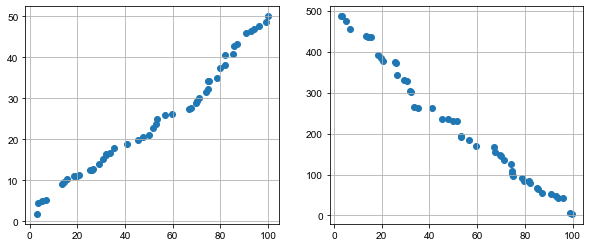

In [3]:
# 图示初判
# (1)变量之间的线性关系
data1 = pd.Series(np.random.rand(50)*100).sort_values()
data2 = pd.Series(np.random.rand(50)*50).sort_values()
data3 = pd.Series(np.random.rand(50)*500).sort_values(ascending=False)
# 创建三个数据:data1为0-100的随机数并从小到大排列；
# data2为0-50的随机数并从小到大排列；
# data3为0-500的随机数并从小到大排列；

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(121)
ax1.scatter(data1, data2)
plt.grid()
# 正线性相关

ax2 = fig.add_subplot(122)
ax2.scatter(data1, data3)
plt.grid()
# 负线性相关



,A,B,C,D
0,-46.406441,78.521308,112.078307,29.604982
1,-201.382861,36.079405,2.006559,229.703374
2,94.492085,-17.927312,-60.958097,-164.346388
3,-108.442568,44.173419,47.040269,91.952964
4,70.695232,-53.928287,13.637588,-16.449829


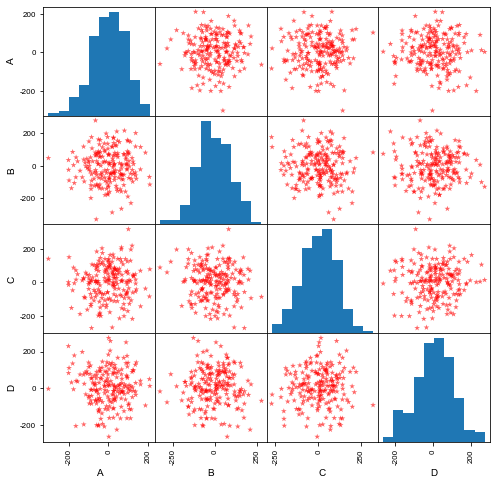

In [7]:
# 图示初判
# (2)散点图矩阵初判多变量间关系
data = pd.DataFrame(np.random.randn(200, 4)*100, columns=['A', 'B', 'C','D'])
pd.plotting.scatter_matrix(data, figsize=(8, 8), c='r', marker='*', diagonal='hist', alpha=0.6, range_padding=0.1)
data.head()

In [12]:
# Pearson相关系数
data1 = pd.Series(np.random.rand(100) * 100).sort_values()
data2 = pd.Series(np.random.rand(100) * 50).sort_values()
data = pd.DataFrame({'value1':data1.values, 'value2':data2.values})
print(data.head())
print('-' * 88)
# 创建样本数据

# 进行正态性检验
# 1.算出均值和标准差
mean1, mean2 = data['value1'].mean(), data['value2'].mean()
std1, std2 = data['value1'].std(), data['value2'].std()
# 调用ks检验
print("value1正态性检验:\n", stats.kstest(data['value1'], 'norm', (mean1, std1)))
print("value2正态性检验:\n", stats.kstest(data['value2'], 'norm', (mean2, std2)))
print('-' * 88)
# pvalue>0.05,表示符合正态分布

data['(data1-mean1)*(data2-mean2)'] = (data['value1'] - mean1) * (data['value2'] - mean2)
data['(data1-mean1)**2'] = (data['value1'] - data['value1'].mean()) ** 2
data['(data2-mean2)**2'] = (data['value2'] - data['value2'].mean()) ** 2

# 计算相关系数
r = data['(data1-mean1)*(data2-mean2)'].sum() / (np.sqrt(data['(data1-mean1)**2'].sum()) * np.sqrt(data['(data2-mean2)**2'].sum()))
print("Pearson相关系数为:%.4f" % r)
# p>0.8高度线性相关

     value1    value2
0  1.464153  0.013210
1  1.709011  0.687029
2  3.028700  1.801113
3  7.636932  1.918488
4  9.274195  2.045330
----------------------------------------------------------------------------------------
value1正态性检验:
 KstestResult(statistic=0.1006097224587783, pvalue=0.24694791462304524)
value2正态性检验:
 KstestResult(statistic=0.08218234972517546, pvalue=0.4909068748360705)
----------------------------------------------------------------------------------------
Pearson相关系数为:0.9876


In [13]:
# Pearson相关系数 - 算法
data1 = pd.Series(np.random.rand(100) * 100).sort_values()
data2 = pd.Series(np.random.rand(100) * 50).sort_values()

data = pd.DataFrame({'value1':data1.values, 'value2':data2.values})
# 创建样本数据

print(data.head())
print('-' * 88)

data.corr()
# Pandas相关性方法
# data.corr(method='pearson', min_periods=1):直接给出数据字段的相关系数矩阵
# method默认pearson

     value1    value2
0  0.734185  0.017080
1  3.984023  1.638881
2  4.033069  1.872169
3  4.437287  2.019951
4  6.541980  2.275153
----------------------------------------------------------------------------------------


,value1,value2
value1,1.000000,0.993166
value2,0.993166,1.000000


In [22]:
# Spearman相关系数
data = pd.DataFrame({'智商':[106,86,100,101,99,103,97,113,112,110],
                    '每周看电视小时数':[7,0,27,50,28,29,20,12,6,17]})
print(data)
print('------')
# 创建样本数据

# 将数据按照智商、每周看电视小时数重新按照从小到大排序，并设定秩次index
data.sort_values('智商', inplace=True)
data['range1'] = np.arange(1, len(data) + 1)
data.sort_values('每周看电视小时数', inplace=True)
data['range2'] = np.arange(1, len(data) + 1)

# 求出di,di2
data['d'] = data['range1'] - data['range2']
data['d2'] = data['d'] ** 2

n = len(data)
# 求出r
r = 1 - 6 * (data['d2'].sum()/(n*(n**2-1)))
print('Spearman相关系数为:\n', r)

    智商  每周看电视小时数
0  106         7
1   86         0
2  100        27
3  101        50
4   99        28
5  103        29
6   97        20
7  113        12
8  112         6
9  110        17
------
Spearman相关系数为:
 -0.17575757575757578


In [24]:
# Spearman相关系数 - 算法
data = pd.DataFrame({'智商':[106,86,100,101,99,103,97,113,112,110],
                    '每周看电视小时数':[7,0,27,50,28,29,20,12,6,17]})
print(data)
print('-' * 88)

data.corr(method='spearman')

    智商  每周看电视小时数
0  106         7
1   86         0
2  100        27
3  101        50
4   99        28
5  103        29
6   97        20
7  113        12
8  112         6
9  110        17
----------------------------------------------------------------------------------------


,智商,每周看电视小时数
智商,1.000000,-0.175758
每周看电视小时数,-0.175758,1.000000
